In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


from collections import Counter
from wordcloud import WordCloud


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Twitter

In [ ]:
df = pd.read_csv('/content/emotion_Training.csv',encoding='UTF-8')
df.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [ ]:
twitter = Twitter()

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
word_list = []
word_list = df['사람문장1']

In [ ]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('남편', 'Noun'), ('과', 'Josa'), ('결혼', 'Noun'), ('한', 'Josa'), ('지', 'Verb'), ('사십', 'Verb'), ('년', 'Noun'), ('이야', 'Josa'), ('.', 'Punctuation'), ('이제', 'Noun'), ('사람', 'Noun'), ('만나는', 'Verb'), ('것', 'Noun'), ('도', 'Josa'), ('버겁고', 'Adjective'), ('알던', 'Verb'), ('사람', 'Noun'), ('도', 'Josa'), ('점점', 'Noun'), ('사라져', 'Verb'), ('.', 'Punctuation')]


In [ ]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in['Noun']:
      noun_list.append(word)

In [ ]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['해도',
 '해도',
 '화가',
 '이번',
 '급여',
 '물가',
 '월급',
 '자꾸',
 '화가',
 '회사',
 '신입',
 '말투',
 '매일',
 '생각',
 '스트레스',
 '직장',
 '막내',
 '이유',
 '온갖',
 '심부름',
 '일도',
 '정말',
 '얼마',
 '입사',
 '신입사원',
 '무시',
 '화가',
 '직장',
 '시간',
 '진로',
 '대한',
 '고민',
 '성인',
 '진로',
 '부모님',
 '퇴사',
 '얼마',
 '직장',
 '졸업',
 '취업',
 '생각',
 '지금',
 '요즘',
 '직장',
 '생활',
 '취업',
 '나이',
 '취업',
 '면접',
 '부모님',
 '직업',
 '대한',
 '질문',
 '큰일',
 '부장',
 '결재',
 '서류',
 '시간',
 '제출',
 '어디',
 '얼마',
 '면접',
 '회사',
 '면접',
 '합격',
 '연락',
 '오늘',
 '다시',
 '입사',
 '취소',
 '통보',
 '가다가',
 '동네',
 '아주머니',
 '취업',
 '당황',
 '어제',
 '합격',
 '통보',
 '회사',
 '문자',
 '잘못',
 '발송',
 '연락',
 '오늘',
 '출근',
 '당황',
 '이번',
 '직장',
 '이직',
 '글쎄',
 '사람',
 '아주',
 '당황',
 '코로나',
 '때문',
 '수가',
 '취직',
 '준비',
 '시험']

In [ ]:
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

[('친구', 7521),
 ('사람', 2892),
 ('요즘', 2808),
 ('회사', 2501),
 ('오늘', 2448),
 ('때문', 2438),
 ('남편', 2367),
 ('정말', 2238),
 ('아내', 2205),
 ('부모님', 2069),
 ('걱정', 2041),
 ('생각', 1975),
 ('우리', 1930),
 ('결혼', 1751),
 ('이번', 1698),
 ('나이', 1687),
 ('엄마', 1625),
 ('직장', 1550),
 ('이제', 1477),
 ('가족', 1409),
 ('자식', 1367),
 ('마음', 1336),
 ('화가', 1308),
 ('아들', 1291),
 ('학교', 1266),
 ('취업', 1245),
 ('기분', 1221),
 ('준비', 1191),
 ('공부', 1157),
 ('자꾸', 1135)]

In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fonts-nanum* -qq

In [ ]:
!sudo apt-get install -y fonts-Nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-Nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache 

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/f

In [ ]:
from wordcloud.wordcloud import FONT_PATH
from os import path

In [ ]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGotic.ttf"

{'친구': 7521, '사람': 2892, '요즘': 2808, '회사': 2501, '오늘': 2448, '때문': 2438, '남편': 2367, '정말': 2238, '아내': 2205, '부모님': 2069, '걱정': 2041, '생각': 1975, '우리': 1930, '결혼': 1751, '이번': 1698, '나이': 1687, '엄마': 1625, '직장': 1550, '이제': 1477, '가족': 1409, '자식': 1367, '마음': 1336, '화가': 1308, '아들': 1291, '학교': 1266, '취업': 1245, '기분': 1221, '준비': 1191, '공부': 1157, '자꾸': 1135}


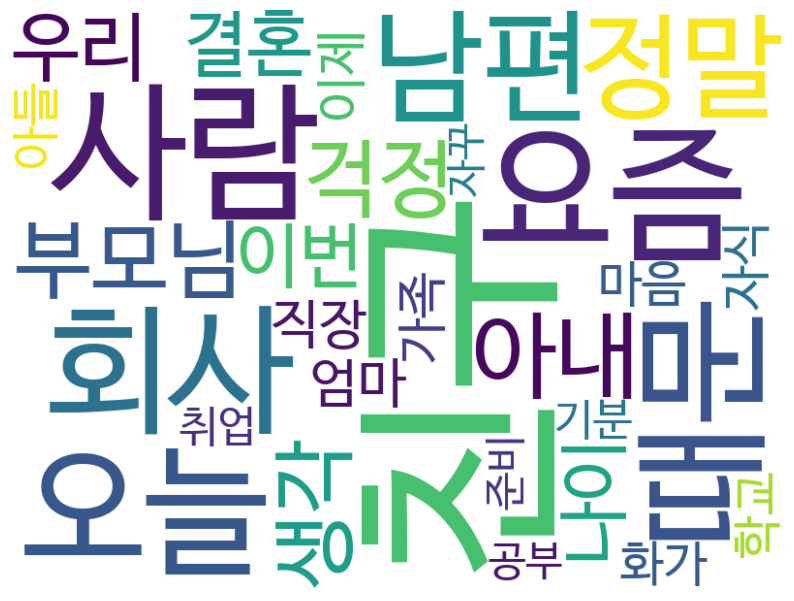

In [ ]:
wordcloud = WordCloud(background_color = 'white',
                      width = 800,
                      height = 600,
                      font_path='/Library/Fonts/NanumBarunGothic.ttf')

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()